In [1]:
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
from scipy.io import FortranFile

import time 
import cftime 

# import modules in other directories
sys.path.append('../Utils/')
import GridUtils as GrU
import MakePressures as MkP
import humiditycalcs as hum
import MyConstants as Con

sys.path.append('../Regridder/')
import Initialize as Prep
import ReadInSrc as RdSrc
import WriteDST as WrDst
import GenRegrid as GR
import latlon_w_scrip as LL
import var_A_x_B as AxB


importlib.reload( AxB)
importlib.reload( LL )
importlib.reload( GR )
importlib.reload( Prep )
importlib.reload( RdSrc )
importlib.reload( WrDst )


Using Flexible parallel/serial VertRegrid 
Using Flexible parallel/serial VertRegrid 


<module 'WriteDST' from '/glade/work/juliob/PyRegridding/Drivers/../Regridder/WriteDST.py'>

In [2]:
####################
case = "test2.02"
BaseDir = "/glade/derecho/scratch/juliob/archive/"


#####################
Src     = 'ne30pg3'
SrcDir  = BaseDir+case+'/atm/hist/'
SrcFile = SrcDir + case + '.cam.h0.2000-01.nc'

####################
Dst     = 'fv0.9x1.25'
DstDir  = BaseDir+case+'/atm/regridded/'
DstFile = DstDir + case + '.cam.h0.2000-01.nc'



In [3]:
regrd,srcf,dstf = AxB.Hregrid( CreateRegrid=True , agrid=Src, bgrid=Dst)

Generating regridding weights. Method BILINEAR : ESMF method= 0


In [4]:
################
src_scrip = '/glade/p/cesmdata/cseg/inputdata/share/scripgrids/ne30pg3_scrip_170611.nc'

X = xr.open_dataset( SrcFile )
phis = X.PHIS.values
lat_src,lon_src = LL.latlon( scrip=src_scrip , gridHkey = 'c' )
phis.shape

u=X.U.values

In [5]:
#############

#phis_yx,lat,lon = AxB.Hregrid(avar=phis,agrid=Src,akey='tc',bgrid=Dst)

phis_yx,lat,lon = AxB.Hregrid(avar=phis,agrid=Src,akey='tc',bgrid=Dst , regrd=regrd, srcf=srcf, dstf=dstf  )



Need to have regrd,srcf, and dstf as args 


In [6]:
u_yx,lat,lon = AxB.Hregrid(avar=u,agrid=Src,akey='tzc',bgrid=Dst)

Generating regridding weights. Method BILINEAR : ESMF method= 0


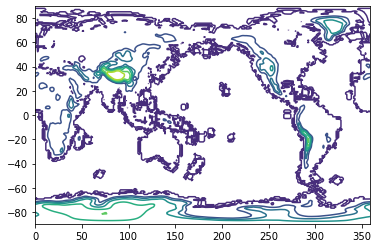

In [7]:
plt.contour(lon,lat,phis_yx[0,:,:])

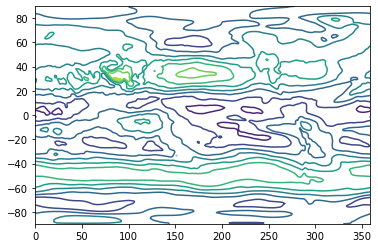

In [8]:
plt.contour(lon,lat,u_yx[0,40,:,:])

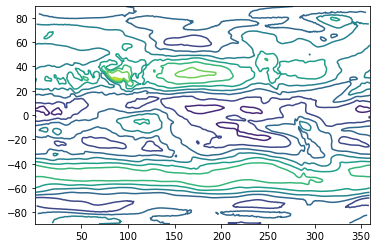

In [9]:
plt.tricontour(lon_src,lat_src,u[0,40,:])

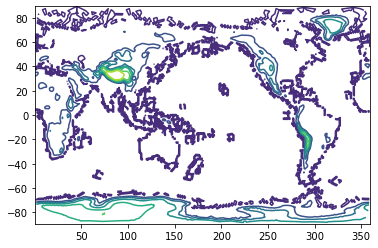

In [10]:
plt.tricontour(lon_src,lat_src,phis[0,:])

In [11]:
####################
if (Src == 'ne30pg3'):
    srcHkey = 'c'
    src_type='mesh'
    src_scrip = '/glade/p/cesmdata/cseg/inputdata/share/scripgrids/ne30pg3_scrip_170611.nc'
    src_TopoFile = '/glade/p/cgd/amp/juliob/bndtopo/latest/ne30pg3_gmted2010_modis_bedmachine_nc3000_Laplace0100_20230105.nc'

if ((Dst == 'fv0.9x1.25') or (Dst=='fv1x1')):
    dstHkey = 'yx'
    dst_type='grid'
    dst_scrip = '/glade/p/cesmdata/cseg/inputdata/share/scripgrids/fv0.9x1.25_141008.nc'
    dst_TopoFile = '/glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1.25_nc3000_Nsw042_Nrs008_Co060_Fi001_ZR_160505.nc'

In [12]:
############

lat_src,lon_src = LL.latlon( scrip=src_scrip , gridHkey = srcHkey )
lat_dst,lon_dst = LL.latlon( scrip=dst_scrip , gridHkey = dstHkey )
